In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from scikitplot.metrics import plot_roc_curve

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("credit_train.csv")
df_train.shape 

(100514, 19)

In [4]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
df_train=df_train.drop(['months since last delinquent','loan id','customer id'],axis=1)

In [5]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
df_train.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [7]:
# let's check unique values
columns=df_train.columns
for col in columns:
    print(col,':\n',df_train[col].unique())
    print(df_train[col].value_counts())
    print('\n',20*'**','\n')

Loan ID :
 ['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f' nan]
14dd8831-6af5-400b-83ec-68e61888a048    2
1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e    2
111602d9-f958-403d-a9d5-4fba630297eb    2
1076b681-b8ff-463f-a7af-576e12edd637    2
f7817002-4e22-4462-8abc-402eb4ceaa6c    2
                                       ..
6c4cac03-f896-4e4c-8503-6c91d83b145b    1
73e806fa-000a-4d7a-ab65-de1b62339427    1
b14a15a8-4d95-4473-9288-77a2b4b486d5    1
c6101fbe-52f3-41b7-b6a1-b062b5f3ad70    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: Loan ID, Length: 81999, dtype: int64

 **************************************** 

Customer ID :
 ['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '2de017a3-2e01-49cb-a581-08169e83be29'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725' ...
 '3e45ffda-99fd-4cfc-b8b8-446f4a505f36'
 '1b3014be-5c07-4d41-abe7-44573c375886' nan]
981165

16.0    1340
15.0    1305
17.0    1219
16.5    1176
14.0    1151
        ... 
3.6        1
70.5       1
52.6       1
52.3       1
51.4       1
Name: Years of Credit History, Length: 506, dtype: int64

 **************************************** 

Months since last delinquent :
 [ nan   8.  29.  10.  33.  76.  25.  46.  34.  53.  30.  32.  21.  50.
  20.  24.  15.   6.  13.  48.  69.  42.  35.   7.  27.   5.  26.  17.
  72.  65.   4.  11.  54.  31.  19.  41.  73.  60.  77.  18.   9.  80.
  70.  38.  47.  82.  74.   0.  16.  75.  61.  79.  62.  56.  64.  36.
  39.  59.  55.  37.  58.  68.  22.  45.  14.  51.  49.   1.  81.  63.
  71.  43.  40.  12.  52.   3.  66.  23.  57.  78.  44.   2.  28.  88.
  67.  85.  89. 118.  83. 152. 120.  92.  86.  94. 110.  93.  97.  84.
 130. 129. 106.  90. 107. 176. 108.  87. 139. 143. 114.  91. 104. 115.
 100. 148. 141.  96. 131.]
13.0     922
12.0     902
14.0     877
15.0     865
10.0     861
        ... 
130.0      1
118.0      1
93.0       1
110.0      

In [8]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


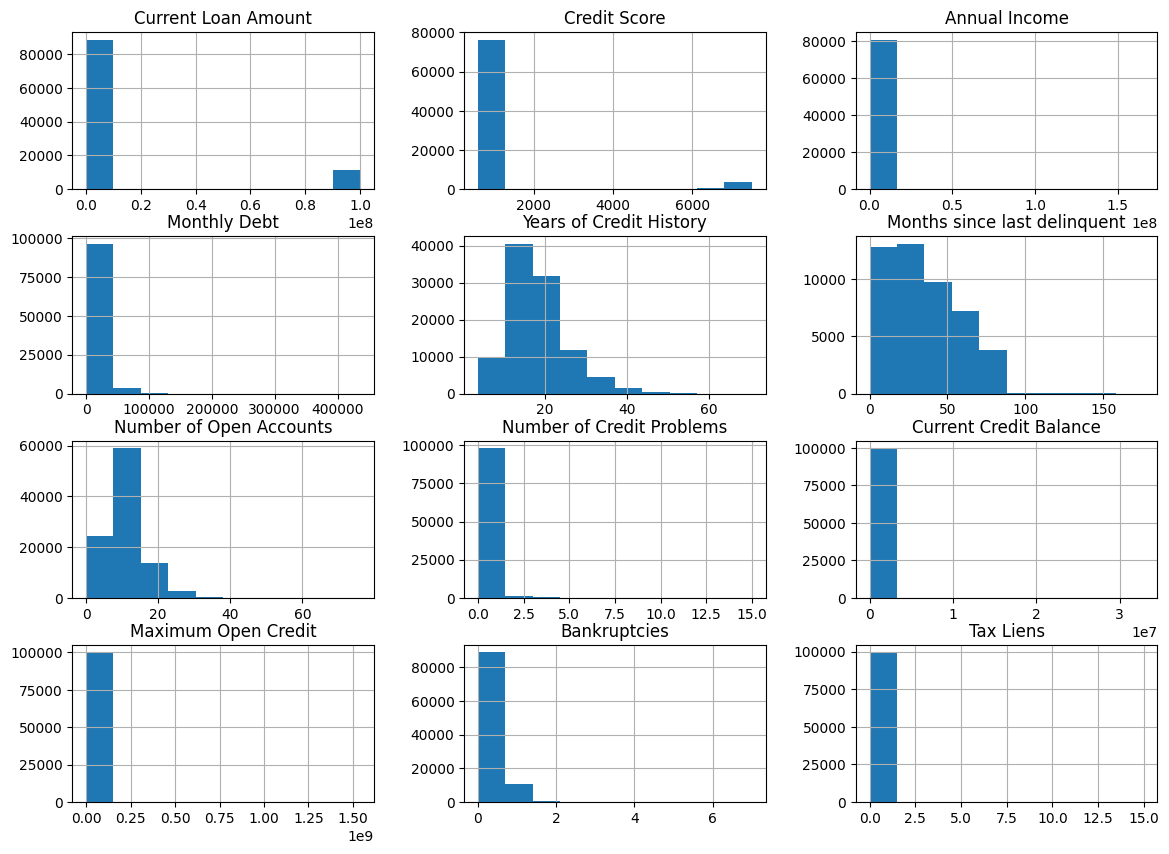

In [9]:
df_train.hist(bins = 10 , figsize= (14,10))
plt.show()

In [11]:
df_train['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

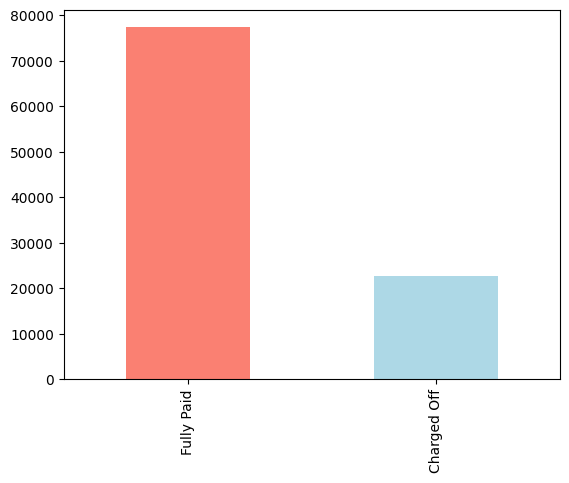

In [12]:
df_train["Loan Status"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

<Axes: ylabel='Loan Status'>

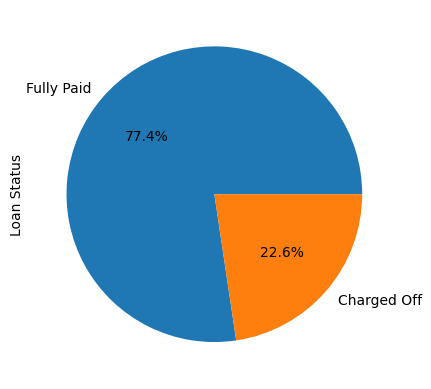

In [13]:
df_train['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [14]:
df_train.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [15]:
df_train['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

Text(0.5, 0, 'Years in current job')

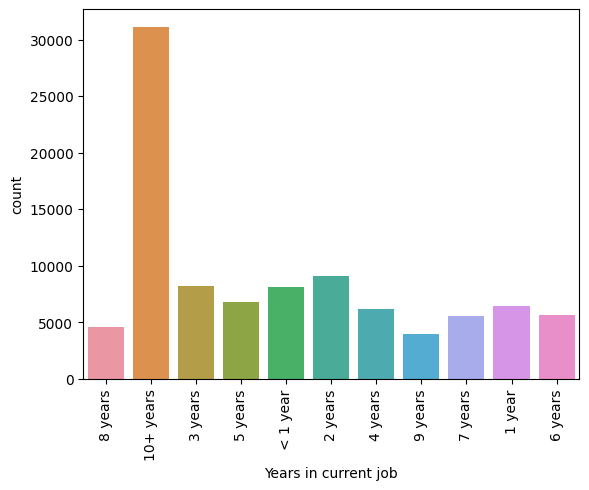

In [16]:
sns.countplot(x=df_train['Years in current job'],data=df_train)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.xlabel('Years in current job')

In [17]:
df_train['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

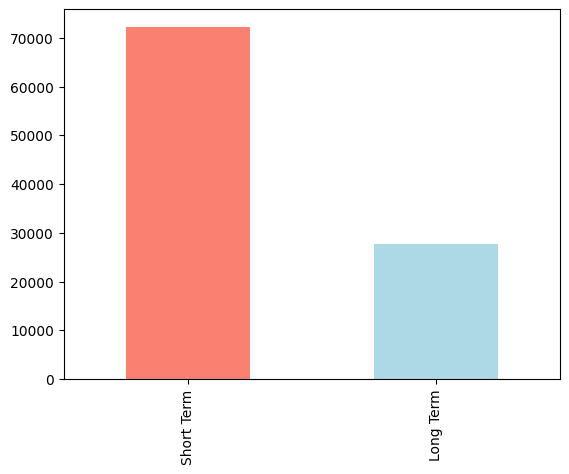

In [18]:
df_train["Term"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

<Axes: ylabel='Term'>

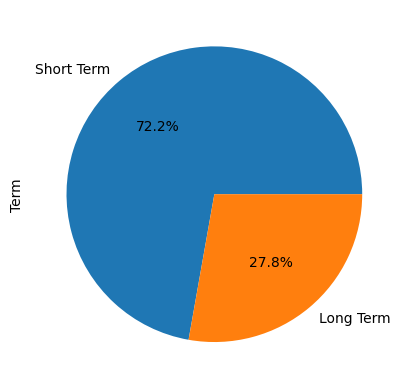

In [19]:
df_train['Term'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [20]:
df_train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [21]:
df_train.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


(12.5, -0.5)

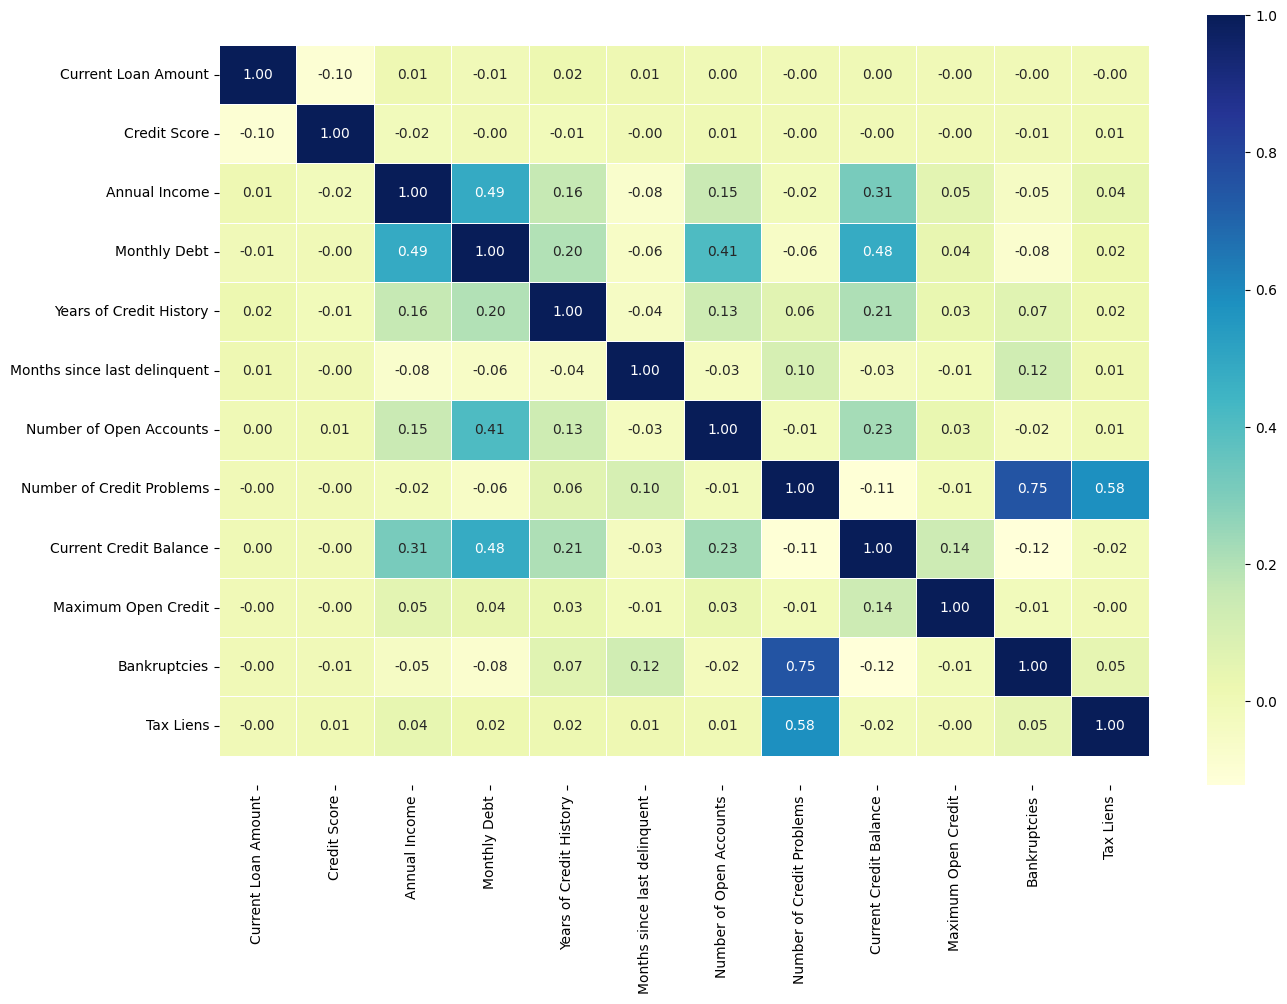

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [23]:
df_train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [24]:
df_train=df_train.dropna

In [25]:
df_train().shape

(36423, 19)

In [26]:
#Modelling

# Split data into X and y
X = df_train.drop("Loan Status", axis=1)

y = df_train["Loan Status"]

AttributeError: 'function' object has no attribute 'drop'

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Naive Bayes" : GaussianNB(),
         "XGBoost": XGBClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
         "AdaBoost": AdaBoostClassifier(),
          "Linear SVC": LinearSVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores